In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from hmm import HiddenMarkovModel
from hmm_fb import HiddenMarkovModel_FB

%matplotlib notebook
matplotlib.rcParams['figure.figsize'] = (9.0, 6.0)

In [2]:
file_name = 'household_power_consumption.txt'
data = pd.read_csv(file_name, sep=';', header=0, low_memory=False)

In [3]:
data = data.dropna(axis=0)
data = data.apply(pd.to_numeric, errors='ignore')

In [4]:
print(len(data))
print(data.dtypes)
data[:10]

2049280
Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


<IPython.core.display.Javascript object>


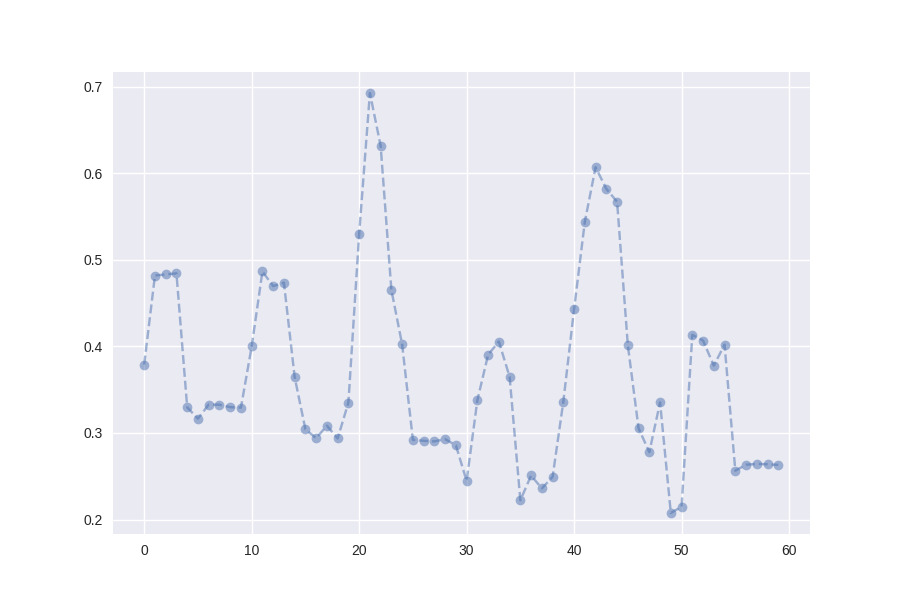

In [11]:
act_pow = data['Global_active_power'][:60]
act_pow = act_pow/max(data['Global_active_power'])
plt.plot(act_pow, '--o', alpha=0.5)

In [6]:
hid_sta = np.array([int(round(x*5)) for x in act_pow])
print(hid_sta[:15])
bcount = 1 / np.bincount(hid_sta)[1:]
print(bcount)
set(hid_sta)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[ 0.05        0.03030303  0.14285714]


{1, 2, 3}

In [7]:
nbr_sta = len(set(hid_sta))
nbr_obs = len(act_pow)

# init_pi = np.random.uniform(0, 1, nbr_sta)
init_pi = 1/nbr_sta * np.ones(nbr_sta)

# init_T = np.random.uniform(0, 1, (nbr_sta, nbr_sta))
init_T = 1/nbr_sta * np.ones((nbr_sta, nbr_sta))

# init_E = np.random.uniform(0, 1, (nbr_obs, nbr_sta))

init_E = np.zeros((nbr_obs, nbr_sta))

for idx, line in enumerate(init_E):
    line[hid_sta[idx] - 1] = bcount[hid_sta[idx] - 1]

obs_seq = [int(round(x, 2) * 100) for x in act_pow]

print('init_pi', '\n', init_pi)
print('init_T', '\n', init_T)
print('init_E', '\n', init_E)

init_pi 
 [ 0.33333333  0.33333333  0.33333333]
init_T 
 [[ 0.33333333  0.33333333  0.33333333]
 [ 0.33333333  0.33333333  0.33333333]
 [ 0.33333333  0.33333333  0.33333333]]
init_E 
 [[ 0.          0.03030303  0.        ]
 [ 0.          0.03030303  0.        ]
 [ 0.          0.03030303  0.        ]
 [ 0.          0.03030303  0.        ]
 [ 0.          0.03030303  0.        ]
 [ 0.          0.03030303  0.        ]
 [ 0.          0.03030303  0.        ]
 [ 0.          0.03030303  0.        ]
 [ 0.          0.03030303  0.        ]
 [ 0.          0.03030303  0.        ]
 [ 0.          0.03030303  0.        ]
 [ 0.          0.03030303  0.        ]
 [ 0.          0.03030303  0.        ]
 [ 0.          0.03030303  0.        ]
 [ 0.          0.03030303  0.        ]
 [ 0.          0.03030303  0.        ]
 [ 0.05        0.          0.        ]
 [ 0.          0.03030303  0.        ]
 [ 0.05        0.          0.        ]
 [ 0.          0.03030303  0.        ]
 [ 0.          0.          0.1428571

In [8]:
model =  HiddenMarkovModel(init_T, init_E, init_pi, epsilon=0.0001, maxStep=5)

# rdn_obs_seq = np.random.uniform(0, 1, 60)
trans0, transition, emission, c = model.run_Baum_Welch_EM(obs_seq)

In [9]:
print("Transition Matrix: ")
print(transition)
print()

print("Emission Matrix: ")
print(emission)
print()

print("Reached Convergence: ")
print(c)

Transition Matrix: 
[[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]]

Emission Matrix: 
[[ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ nan